## Individual Assignment 1, International Climate Policy

- Neil Stein, 12410247

In [9]:
# Setup steps
import matplotlib.pyplot as plt
import seaborn as se
import pandas as pd
import numpy as np
import time

# data loading

perth_df = pd.read_csv("indiv1_perth_airport.csv")
gmst_df = pd.read_csv("indiv1_gmst_monthly_fixed.csv")
us_income_df = pd.read_csv("indiv1_us_counties_incomes.csv")
us_temp_df = pd.read_csv("indiv1_us_counties_temperature.csv")


![Alt text](Part_1_Images/IMG_7625.JPG "Part A")
![Alt text](Part_1_Images/IMG_7626.JPG "Part B")
![Alt text](Part_1_Images/IMG_7627.JPG "Part C")
![Alt text](Part_1_Images/IMG_7628.JPG "Part D")
![Alt text](Part_1_Images/IMG_7629.JPG "Part E")

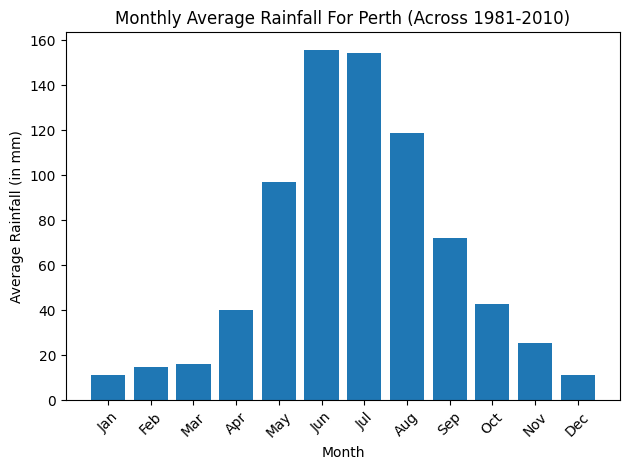

In [12]:
# Problem 2 - Perth
# part(a) - Plotting monthly precipitation

# cleanup and reorienting the data to be grouped by month
perth_df = perth_df.dropna()
perth_df['DATE'] = pd.to_datetime(perth_df['DATE'], format= '%Y-%m')

# subset the data to get 1981 - 2010
start_date = pd.to_datetime('1981-01-01')
end_date = pd.to_datetime('2010-12-31')
filtered_perth_df = perth_df[(perth_df['DATE'] >= start_date) & (perth_df['DATE'] <= end_date)]

# creating our monthly averages
perth_df['MONTH'] = perth_df['DATE'].dt.month
perth_monthly = perth_df.groupby('MONTH')['PRCP'].mean()


# setting up the plotting
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.bar(months, perth_monthly.values)
plt.xlabel("Month")
plt.ylabel("Average Rainfall (in mm)")
plt.title("Monthly Average Rainfall For Perth (Across 1981-2010)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Problem 2(a) #
We can see from the chart that June is slightly higher in terms of precipitation for the time slice of focus within the rainfall data from the Perth Airport

In [ ]:
# Problem 2(b) - Plotting July Rainfall trends

